In [1]:
from pathlib import Path
import os
workdir = Path("/ibstorage/anthony/NYS_Wetlands_GHG/")
print(workdir)
os.chdir(workdir)
current_working_dir = Path.cwd()
print(f"Current working directory is now: {current_working_dir}")

/ibstorage/anthony/NYS_Wetlands_GHG
Current working directory is now: /ibstorage/anthony/NYS_Wetlands_GHG


In [2]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# === FILE PATHS (update these to match your setup) ===
naip_path = "Data/NAIP/HUC_NAIP_Processed/cluster_208_huc_041402011002_NAIP_metrics.tif"
dem_path = "Data/TerrainProcessed/HUC_DEMs/cluster_208_huc_041402011002.tif"
wetlands_path = "Data/Training_Data/HUC_Extracted_Training_Data/cluster_208_huc_041402011002_NWI.gpkg"

# === LOAD AND INSPECT RASTERS ===
print("=" * 50)
print("NAIP METRICS")
print("=" * 50)
with rasterio.open(naip_path) as src:
    print(f"Shape: {src.count} bands, {src.height} rows, {src.width} cols")
    print(f"CRS: {src.crs}")
    print(f"Bounds: {src.bounds}")
    print(f"Resolution: {src.res}")
    naip_bounds = src.bounds
    naip_crs = src.crs

print("\n" + "=" * 50)
print("DEM")
print("=" * 50)
with rasterio.open(dem_path) as src:
    print(f"Shape: {src.count} bands, {src.height} rows, {src.width} cols")
    print(f"CRS: {src.crs}")
    print(f"Bounds: {src.bounds}")
    print(f"Resolution: {src.res}")
    dem_bounds = src.bounds
    dem_crs = src.crs

NAIP METRICS
Shape: 6 bands, 12000 rows, 18000 cols
CRS: EPSG:6347
Bounds: BoundingBox(left=380999.9999999997, bottom=4705500.000000001, right=398999.9999999997, top=4717500.000000001)
Resolution: (1.0, 1.0)

DEM
Shape: 1 bands, 12000 rows, 18000 cols
CRS: EPSG:6347
Bounds: BoundingBox(left=380999.9999999997, bottom=4705500.000000001, right=398999.9999999997, top=4717500.000000001)
Resolution: (1.0, 1.0)


In [5]:
# === LOAD AND INSPECT WETLANDS ===
print("\n" + "=" * 50)
print("WETLAND POLYGONS")
print("=" * 50)
wetlands = gpd.read_file(wetlands_path)
print(f"CRS: {wetlands.crs}")
print(f"Number of polygons: {len(wetlands)}")
print(f"Columns: {list(wetlands.columns)}")
print(f"\nWetland type counts:")
print(wetlands['MOD_CLASS'].value_counts())  # Adjust column name if different


WETLAND POLYGONS
CRS: EPSG:6347
Number of polygons: 296
Columns: ['MOD_CLASS', 'geometry']

Wetland type counts:
MOD_CLASS
OWW    100
FSW     69
SSW     69
EMW     58
Name: count, dtype: int64


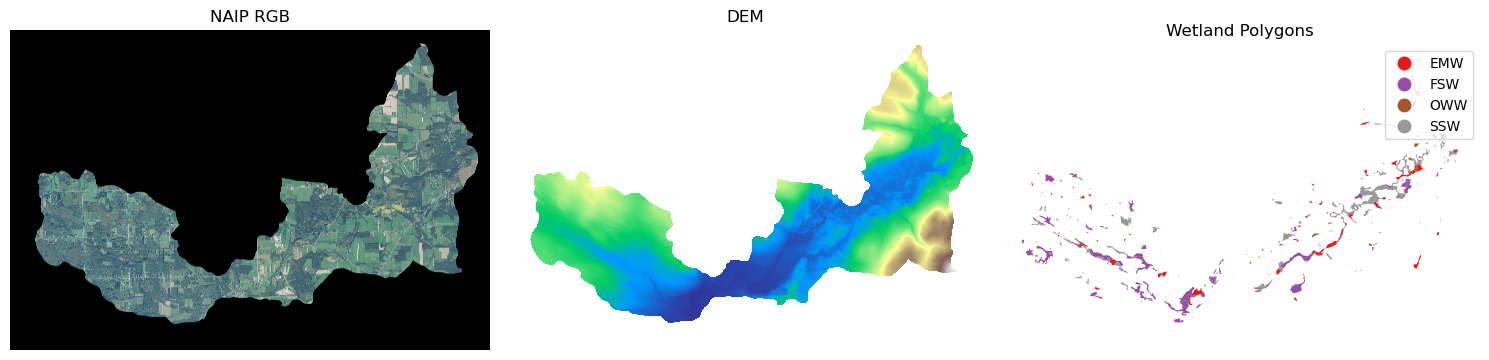


Saved visualization to data_exploration.png


In [6]:
# === QUICK VISUALIZATION ===
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# RGB composite from NAIP
with rasterio.open(naip_path) as src:
    r = src.read(1)
    g = src.read(2)
    b = src.read(3)
    
    # Create a mask for valid pixels (not NaN in any band)
    valid_mask = ~(np.isnan(r) | np.isnan(g) | np.isnan(b))
    
    # Normalize to 0-1 using known range (0-255)
    r = r / 255.0
    g = g / 255.0
    b = b / 255.0
    
    # Set NaN pixels to 0 (will appear black) or use masked array
    r = np.nan_to_num(r, nan=0)
    g = np.nan_to_num(g, nan=0)
    b = np.nan_to_num(b, nan=0)
    
    rgb = np.dstack([r, g, b])

axes[0].imshow(rgb)
axes[0].set_title("NAIP RGB")
axes[0].axis('off')

# DEM
with rasterio.open(dem_path) as src:
    dem = src.read(1)

axes[1].imshow(dem, cmap='terrain')
axes[1].set_title("DEM")
axes[1].axis('off')

# Wetlands
wetlands.plot(ax=axes[2], column='MOD_CLASS', legend=True, cmap='Set1')
axes[2].set_title("Wetland Polygons")
axes[2].axis('off')

plt.tight_layout()
# plt.savefig("data_exploration.png", dpi=150)
plt.show()

print("\nSaved visualization to data_exploration.png")

In [7]:
import geopandas as gpd

wetlands_path = "Data/Training_Data/HUC_Extracted_Training_Data/cluster_208_huc_041402011002_NWI.gpkg"
wetlands = gpd.read_file(wetlands_path)

print(wetlands['MOD_CLASS'].unique())

['OWW' 'EMW' 'FSW' 'SSW']
